In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Shahzan\Desktop\TSF\student_scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


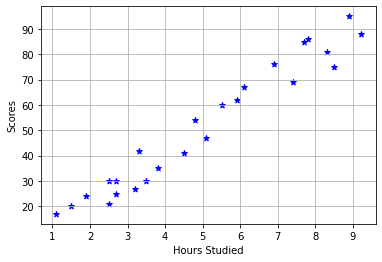

In [4]:
x = df['Hours']
y = df['Scores']
plt.scatter(x, y, label="Data Points", color = "Blue", marker = "*")
plt.xlabel("Hours Studied")
plt.ylabel("Scores")
plt.grid()
plt.rcParams['axes.facecolor'] = '#ffffff'

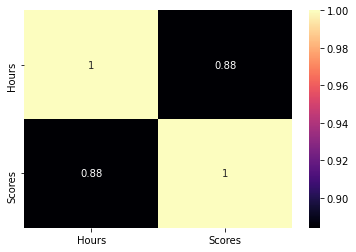

shows co-relation upto 96% between hours & studies


In [5]:
relation = df.corr(method="kendall")
sns.heatmap(relation, annot=True, cmap='magma')
plt.show()
print("shows co-relation upto 96% between hours & studies")

In [6]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

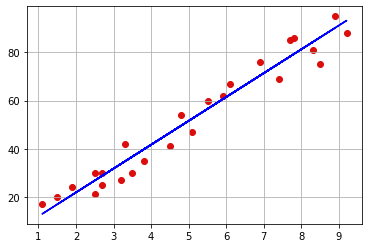

(array([9.91065648]), 2.018160041434662)

In [14]:
line = model.coef_ * x + model.intercept_
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(x, y, color = '#db0d0d')
plt.plot(x, line, color = 'blue')
plt.grid()
plt.show()
model.coef_, model.intercept_

In [16]:
y_pred = model.predict(x_test)
print(y_pred)
pred_data = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
print(pred_data)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


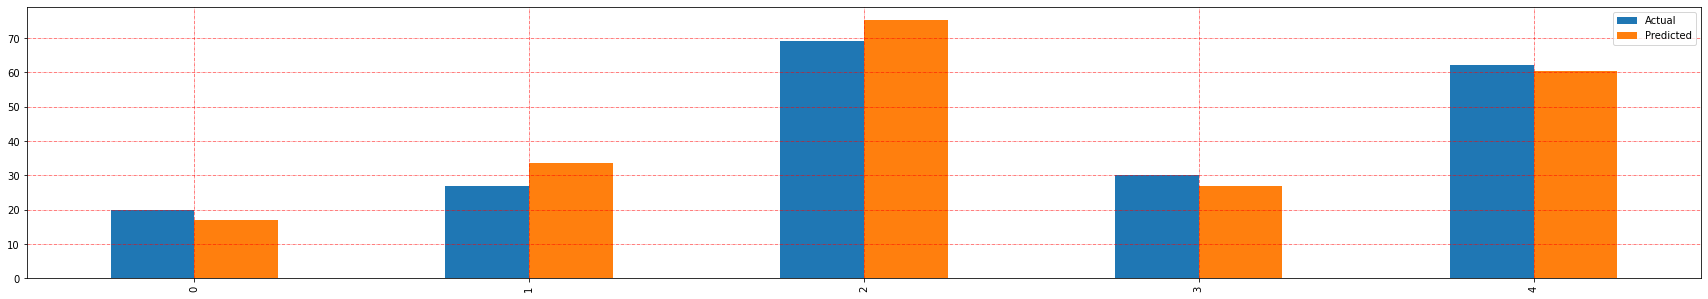

In [17]:
graph = pred_data.head()
graph.plot(kind='bar',figsize=(30,5))
plt.grid(which = 'both', color='red', linestyle='-.', linewidth=0.5)
plt.show()

In [18]:
print(f'The train score: {model.score(x_train,y_train)}')
print(f'The test score: {model.score(x_test,y_test)}')

The train score: 0.9515510725211552
The test score: 0.9454906892105354


In [19]:
hours = [[9.25]]
prediction = model.predict(hours)
print ("Number of hours : " ,hours)
print ("Number of hours : " ,prediction)

Number of hours :  [[9.25]]
Number of hours :  [93.69173249]
